<a href="https://colab.research.google.com/github/Rustydinoco/ML_Learning/blob/master/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ticket = "BTC-USD"
df = yf.download(ticket, start="2023-01-01", end="2025-01-01")
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-01-01,16625.080078,16630.439453,16521.234375,16547.914062,9244361700
2023-01-02,16688.470703,16759.343750,16572.228516,16625.509766,12097775227
2023-01-03,16679.857422,16760.447266,16622.371094,16688.847656,13903079207
2023-01-04,16863.238281,16964.585938,16667.763672,16680.205078,18421743322
2023-01-05,16836.736328,16884.021484,16790.283203,16863.472656,13692758566
...,...,...,...,...,...
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2023-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   731 non-null    float64
 1   (High, BTC-USD)    731 non-null    float64
 2   (Low, BTC-USD)     731 non-null    float64
 3   (Open, BTC-USD)    731 non-null    float64
 4   (Volume, BTC-USD)  731 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.3 KB


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,731.000000,731.000000,731.000000,731.000000,7.310000e+02
mean,47437.161067,48255.729437,46474.866471,47332.259656,2.785814e+10
std,21675.093627,22139.627068,21128.637216,21639.069063,1.921014e+10
min,16625.080078,16630.439453,16521.234375,16547.914062,5.331173e+09
25%,27778.728516,28185.916992,27245.493164,27756.757812,1.483281e+10
50%,42658.667969,43354.296875,41826.335938,42641.511719,2.299209e+10
75%,64148.892578,65558.232422,62788.615234,64109.300781,3.431423e+10
max,106140.601562,108268.445312,105291.734375,106147.296875,1.492189e+11


In [ ]:
df.shape

(731, 5)

In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,BTC-USD,0
High,BTC-USD,0
Low,BTC-USD,0
Open,BTC-USD,0
Volume,BTC-USD,0


In [ ]:
MinMaxScaler = MinMaxScaler()
df_scaled = MinMaxScaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,0.000000,0.000000,0.000000,0.000000,0.027196
1,0.000708,0.001407,0.000574,0.000866,0.047027
2,0.000612,0.001419,0.001139,0.001573,0.059574
3,0.002661,0.003646,0.001651,0.001476,0.090978
4,0.002364,0.002767,0.003031,0.003522,0.058112
...,...,...,...,...,...
726,0.866216,0.880251,0.865034,0.883455,0.327260
727,0.877377,0.860947,0.872960,0.866214,0.130492
728,0.859126,0.857116,0.860202,0.877530,0.168914


In [ ]:
X = df_scaled.drop("Close", axis=1)
y = df_scaled["Close"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
LinearRegression = LinearRegression()
model = LinearRegression.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred_fix = y_pred.ravel()
y_test = y_test.iloc[:, 0]
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_fix})
df_pred

,Actual,Predicted
703,0.917645,0.905820
33,0.076235,0.076774
300,0.195100,0.196375
456,0.592937,0.585616
633,0.519665,0.525498
...,...,...
70,0.061876,0.058183
192,0.153790,0.155808
328,0.236514,0.235209
165,0.099997,0.097751


In [ ]:
print(" R2 = ", round(r2_score(y_test, y_pred), 2))

 R2 =  1.0


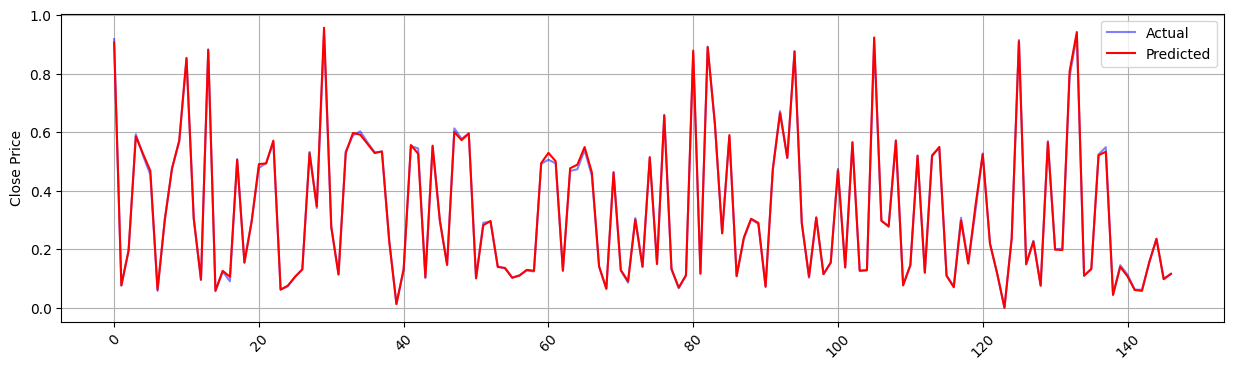

In [ ]:
plt.figure(figsize= (15, 4))
plt.plot(range(len(y_test)), y_test, label="Actual", color = "blue", alpha = 0.5)
plt.plot(range(len(y_pred_fix)), y_pred_fix, label="Predicted", color = "red" )
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()